# Atari RL Games

### Cart Pole

In [1]:
import gymnasium as gym
import torch
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

In [2]:
#Seting up the environment
env = gym.make("CartPole-v1", render_mode="human")

In [3]:
#Define the model using Deep Q-Network (DQN)
model = DQN(
    "MlpPolicy", env, verbose=1, 
    learning_rate=0.001, 
    buffer_size=15000, 
    batch_size=64, 
    gamma=0.99, 
    exploration_final_eps=0.1, 
    target_update_interval=800,
    train_freq=4,
    learning_starts=10000
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [4]:
#Training the model
model.learn(total_timesteps=50000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.5     |
|    ep_rew_mean      | 36.5     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 16       |
|    time_elapsed     | 8        |
|    total_timesteps  | 146      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.8     |
|    ep_rew_mean      | 33.8     |
|    exploration_rate | 0.951    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 23       |
|    time_elapsed     | 11       |
|    total_timesteps  | 270      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.4     |
|    ep_rew_mean      | 31.4     |
|    exploration_rate | 0.932    |
| time/               |          |
|    episodes       

In [5]:
#Saving the trained model
model.save("dqn_cartpole")

In [6]:
def evaluate_model(env, model, num_episodes=10):
   
    episode_rewards = []
    for _ in range(num_episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
        episode_rewards.append(total_reward)
    return episode_rewards

In [7]:
#Evaluate the model
rewards = evaluate_model(env, model)
print(f"Average reward over 10 episodes: {sum(rewards)/len(rewards)}")

Average reward over 10 episodes: 12.5


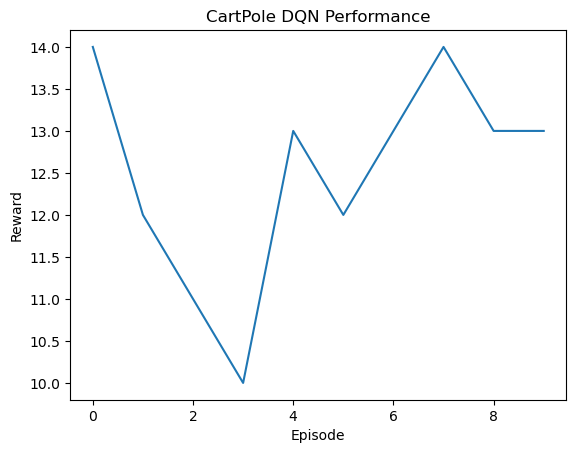

In [8]:
#Visualization of rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("CartPole DQN Performance")
plt.show()

In [9]:
#Close the environment
env.close()

### Space Invaders

In [1]:
import gymnasium as gym
import torch
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

In [2]:
import gymnasium as gym
import ale_py

#List available Atari games
print(gym.envs.registry.keys())

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v3', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Walker2d-v5', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5

In [3]:
#Setting up the Space Invaders environment
env = gym.make("ALE/SpaceInvaders-v5", render_mode=None)

In [4]:
# Define the model using Deep Q-Network (DQN)
model = DQN(
    "CnnPolicy", env, verbose=1, 
    learning_rate=0.001, 
    buffer_size=1000, 
    batch_size=32, 
    gamma=0.99, 
    exploration_final_eps=0.1, 
    target_update_interval=5000,
    train_freq=4,
    learning_starts=60000
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [5]:
#Training the model
model.learn(total_timesteps=50000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 878      |
|    ep_rew_mean      | 278      |
|    exploration_rate | 0.368    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 303      |
|    time_elapsed     | 11       |
|    total_timesteps  | 3512     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 694      |
|    ep_rew_mean      | 192      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8        |
|    fps              | 287      |
|    time_elapsed     | 19       |
|    total_timesteps  | 5555     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 625      |
|    ep_rew_mean      | 178      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes       

In [6]:
#Save the trained model
model.save("dqn_space_invaders")

In [7]:
def evaluate_model(env, model, num_episodes=10):
   
    episode_rewards = []
    for _ in range(num_episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
        episode_rewards.append(total_reward)
    return episode_rewards

In [8]:
#Evaluate the model
rewards = evaluate_model(env, model)
print(f"Average reward over 10 episodes: {sum(rewards)/len(rewards)}")

Average reward over 10 episodes: 0.0


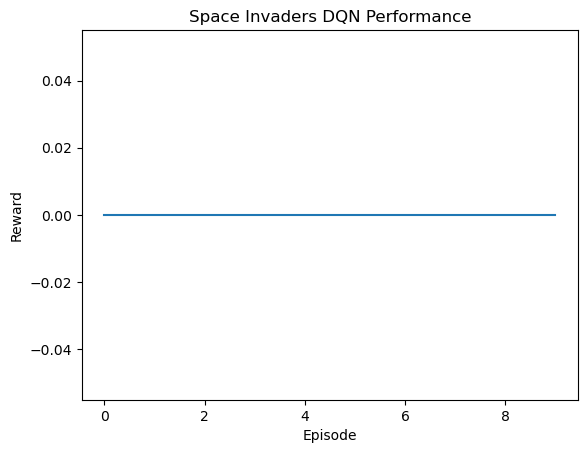

In [9]:
#Visualization of rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Space Invaders DQN Performance")
plt.show()

In [10]:
#Close the environment
env.close()

### Pac Man

In [11]:
import gymnasium as gym
import torch
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

In [12]:
#Seting up the Pac-Man environment
env = gym.make("ALE/MsPacman-v5", render_mode=None)

In [13]:
# Define the model using Deep Q-Network (DQN)
model = DQN(
    "CnnPolicy", env, verbose=1, 
    learning_rate=0.001, 
    buffer_size=10000, 
    batch_size=32, 
    gamma=0.99, 
    exploration_final_eps=0.1, 
    target_update_interval=6000,
    train_freq=4,
    learning_starts=60000
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [14]:
# Train the model
model.learn(total_timesteps=50000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 577      |
|    ep_rew_mean      | 355      |
|    exploration_rate | 0.585    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 377      |
|    time_elapsed     | 6        |
|    total_timesteps  | 2308     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 560      |
|    ep_rew_mean      | 314      |
|    exploration_rate | 0.193    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 368      |
|    time_elapsed     | 12       |
|    total_timesteps  | 4482     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 268      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes       

In [15]:
# Save the trained model
model.save("dqn_pacman")

In [16]:
def evaluate_model(env, model, num_episodes=10):
   
    episode_rewards = []
    for _ in range(num_episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
        episode_rewards.append(total_reward)
    return episode_rewards

In [17]:
#Evaluate the model
rewards = evaluate_model(env, model)
print(f"Average reward over 10 episodes: {sum(rewards)/len(rewards)}")

Average reward over 10 episodes: 60.0


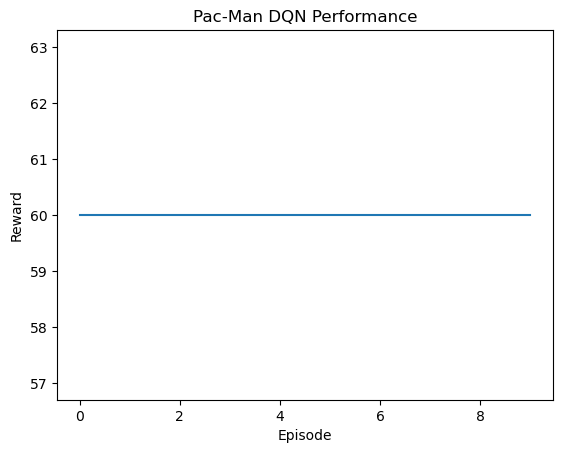

In [18]:
# Visualization of rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Pac-Man DQN Performance")
plt.show()

In [19]:
#Close the environment
env.close()